In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from IPython.display import clear_output
from pylab import rcParams
rcParams["figure.figsize"] = 15, 6
import numpy.random as rng
np.random.seed(100689)

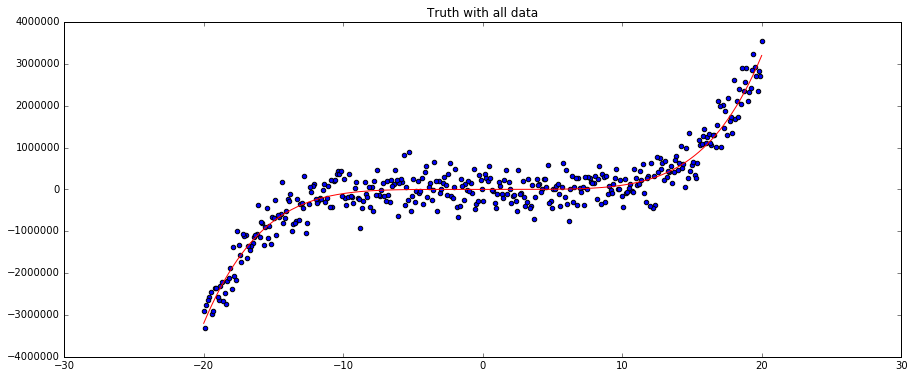

In [2]:
f = lambda x: 0.5 + x**5 #+ 0.2*np.exp(x)
n = 400
X = np.linspace(-20,20,n)
yTrue = f(X)
Y = yTrue + rng.normal(0,300000,n)
X = np.expand_dims(X,1)
Y = np.expand_dims(Y,1)
XPlot = X.copy()
plt.plot(XPlot,yTrue,"r")
XY = np.concatenate((X,Y),1)
XY = XY[np.random.permutation(XY.shape[0])]
X, Y = XY[:,0], XY[:,1]
plt.scatter(X,Y)
plt.title("Truth with all data")
plt.show()


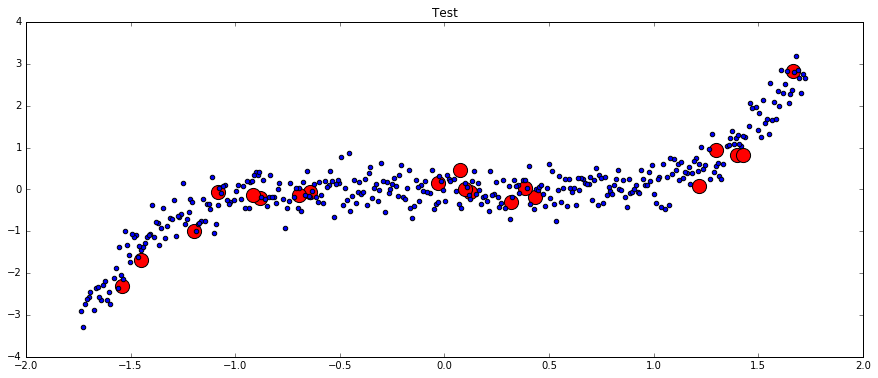

In [3]:
split = 20
X = np.expand_dims(X,1)
Y = np.expand_dims(Y,1)
XTr, XTe = X[:split], X[split:]
YTr, YTe = Y[:split], Y[split:]

norm = lambda x: (x-x.mean())/x.std()
XTr, YTr = norm(XTr), norm(YTr)
XTe, YTe = norm(XTe), norm(YTe)

plt.title("Test")
plt.scatter(XTr,YTr,c="r",s=200)
plt.scatter(XTe,YTe)
plt.show()

In [4]:
x, y = tf.placeholder(tf.float32,shape=[None,1]), tf.placeholder(tf.float32,shape=[None,1])
lr = tf.placeholder(tf.float32)
yPred = tf.Variable(tf.random_normal([1],mean=1,stddev=1), name='bias')
poly = 4

#     for power in range(1, 3):
#             W = tf.Variable(tf.random_normal([1],mean=0.0,stddev=0.1), name='weight_d'.format(power))
#             yPred = tf.add(tf.mul(tf.pow(x, power), W), yPred)

W1 = tf.Variable(tf.random_normal([1],mean=0.0,stddev=0.4))
W2 = tf.Variable(tf.random_normal([1],mean=0.0,stddev=0.4))
W3 = tf.Variable(tf.random_normal([1],mean=0.0,stddev=0.4))
W4 = tf.Variable(tf.random_normal([1],mean=0.0,stddev=0.4))
W5 = tf.Variable(tf.random_normal([1],mean=0.0,stddev=0.4))
W6 = tf.Variable(tf.random_normal([1],mean=0.0,stddev=0.4))

yPred = yPred + tf.mul(tf.pow(x, 1), W1) + tf.mul(tf.pow(x, 2), W2) + tf.mul(tf.pow(x, 3), W3) + tf.mul(tf.pow(x, 4), W4) + tf.mul(tf.pow(x, 5), W5) + tf.mul(tf.pow(x, 6), W6)
mse = tf.reduce_mean(tf.pow(yPred - y, 2))
mseL2 = mse 

l2Pen = tf.placeholder(tf.float32)
mseL2 = l2Pen*(tf.nn.l2_loss(W1)) + l2Pen*(tf.nn.l2_loss(W2)) + l2Pen*(tf.nn.l2_loss(W3)) +  l2Pen*(tf.nn.l2_loss(W4)) +  l2Pen*(tf.nn.l2_loss(W5)) + l2Pen*(tf.nn.l2_loss(W6))  + mseL2
    
train = tf.train.AdamOptimizer(lr).minimize(mseL2)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0 of 15. Current tr/te errors = 2.34/5.85
1 of 15. Current tr/te errors = 0.72/0.97
2 of 15. Current tr/te errors = 0.35/0.71
3 of 15. Current tr/te errors = 0.22/0.65
4 of 15. Current tr/te errors = 0.15/0.52
5 of 15. Current tr/te errors = 0.12/0.44
6 of 15. Current tr/te errors = 0.11/0.41
7 of 15. Current tr/te errors = 0.10/0.38
8 of 15. Current tr/te errors = 0.09/0.37
9 of 15. Current tr/te errors = 0.09/0.35
10 of 15. Current tr/te errors = 0.09/0.34
11 of 15. Current tr/te errors = 0.08/0.33
12 of 15. Current tr/te errors = 0.08/0.32
13 of 15. Current tr/te errors = 0.08/0.31
14 of 15. Current tr/te errors = 0.07/0.30


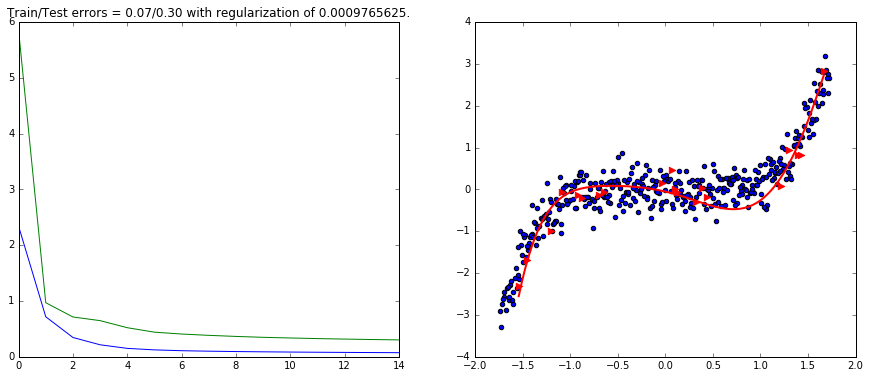

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0 of 15. Current tr/te errors = 3.77/3.91
1 of 15. Current tr/te errors = 1.14/1.54
2 of 15. Current tr/te errors = 0.72/0.72
3 of 15. Current tr/te errors = 0.29/0.40
4 of 15. Current tr/te errors = 0.23/0.25
5 of 15. Current tr/te errors = 0.13/0.19
6 of 15. Current tr/te errors = 0.12/0.16
7 of 15. Current tr/te errors = 0.09/0.15
8 of 15. Current tr/te errors = 0.08/0.14
9 of 15. Current tr/te errors = 0.08/0.14
10 of 15. Current tr/te errors = 0.07/0.13
11 of 15. Current tr/te errors = 0.07/0.13
12 of 15. Current tr/te errors = 0.06/0.13
13 of 15. Current tr/te errors = 0.06/0.13
14 of 15. Current tr/te errors = 0.06/0.13


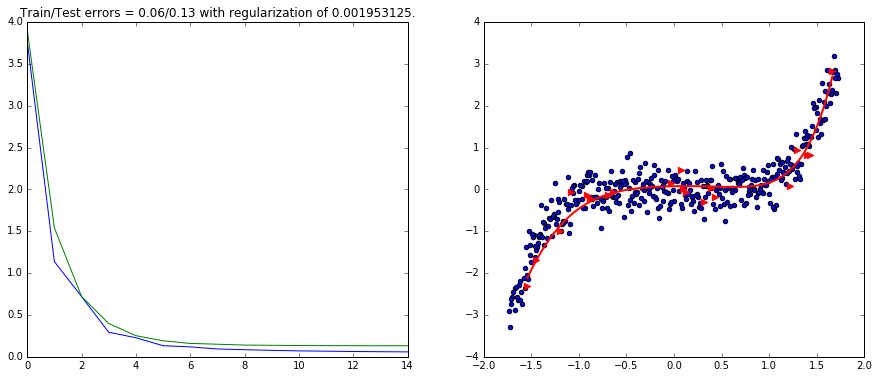

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0 of 15. Current tr/te errors = 0.16/0.21
1 of 15. Current tr/te errors = 0.43/0.46
2 of 15. Current tr/te errors = 0.19/0.31
3 of 15. Current tr/te errors = 0.10/0.18
4 of 15. Current tr/te errors = 0.09/0.18
5 of 15. Current tr/te errors = 0.09/0.18
6 of 15. Current tr/te errors = 0.08/0.18
7 of 15. Current tr/te errors = 0.08/0.17
8 of 15. Current tr/te errors = 0.08/0.17
9 of 15. Current tr/te errors = 0.07/0.17
10 of 15. Current tr/te errors = 0.07/0.17
11 of 15. Current tr/te errors = 0.07/0.17
12 of 15. Current tr/te errors = 0.07/0.17
13 of 15. Current tr/te errors = 0.07/0.17
14 of 15. Current tr/te errors = 0.07/0.17


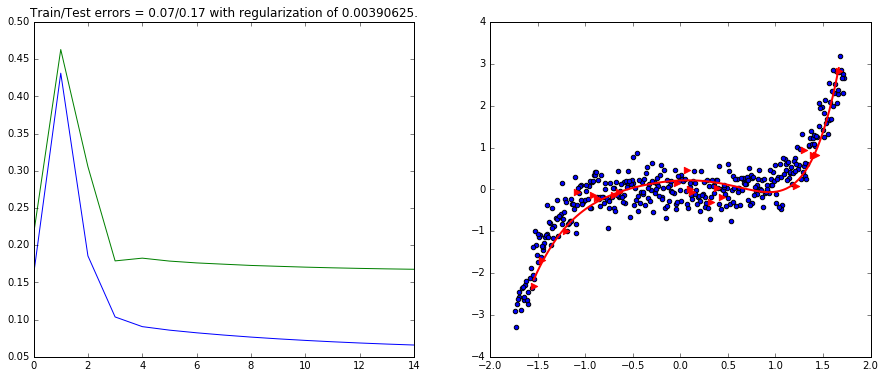


0 of 15. Current tr/te errors = 1.78/4.67


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


1 of 15. Current tr/te errors = 0.40/0.92
2 of 15. Current tr/te errors = 0.28/0.46
3 of 15. Current tr/te errors = 0.17/0.65
4 of 15. Current tr/te errors = 0.14/0.35
5 of 15. Current tr/te errors = 0.11/0.44
6 of 15. Current tr/te errors = 0.10/0.29
7 of 15. Current tr/te errors = 0.09/0.36
8 of 15. Current tr/te errors = 0.08/0.27
9 of 15. Current tr/te errors = 0.08/0.30
10 of 15. Current tr/te errors = 0.07/0.26
11 of 15. Current tr/te errors = 0.07/0.26
12 of 15. Current tr/te errors = 0.07/0.25
13 of 15. Current tr/te errors = 0.06/0.24
14 of 15. Current tr/te errors = 0.06/0.24


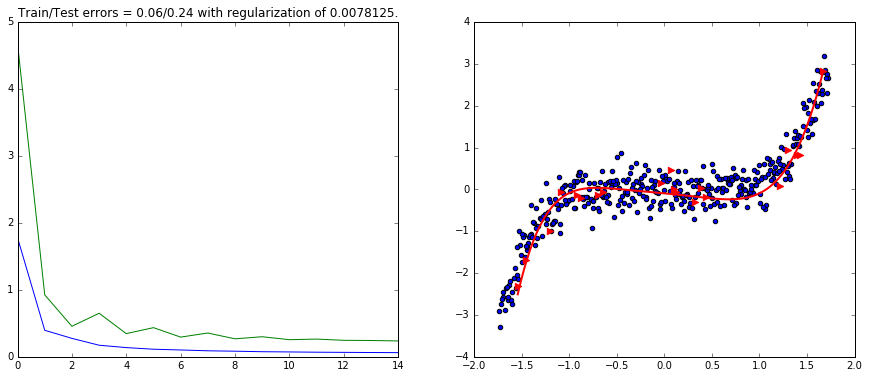

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0 of 15. Current tr/te errors = 1.11/1.78
1 of 15. Current tr/te errors = 0.21/0.36
2 of 15. Current tr/te errors = 0.14/0.31
3 of 15. Current tr/te errors = 0.12/0.30
4 of 15. Current tr/te errors = 0.10/0.28
5 of 15. Current tr/te errors = 0.10/0.29
6 of 15. Current tr/te errors = 0.09/0.27
7 of 15. Current tr/te errors = 0.09/0.27
8 of 15. Current tr/te errors = 0.09/0.26
9 of 15. Current tr/te errors = 0.08/0.26
10 of 15. Current tr/te errors = 0.08/0.26
11 of 15. Current tr/te errors = 0.08/0.25
12 of 15. Current tr/te errors = 0.08/0.25
13 of 15. Current tr/te errors = 0.08/0.25
14 of 15. Current tr/te errors = 0.08/0.24


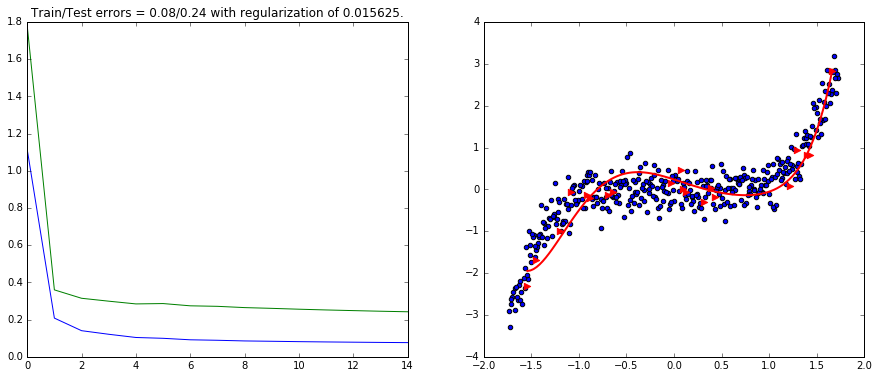


0 of 15. Current tr/te errors = 0.56/0.88


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


1 of 15. Current tr/te errors = 0.75/0.71
2 of 15. Current tr/te errors = 0.23/0.30
3 of 15. Current tr/te errors = 0.19/0.19
4 of 15. Current tr/te errors = 0.14/0.16
5 of 15. Current tr/te errors = 0.12/0.14
6 of 15. Current tr/te errors = 0.11/0.13
7 of 15. Current tr/te errors = 0.10/0.13
8 of 15. Current tr/te errors = 0.09/0.13
9 of 15. Current tr/te errors = 0.09/0.13
10 of 15. Current tr/te errors = 0.08/0.12
11 of 15. Current tr/te errors = 0.08/0.12
12 of 15. Current tr/te errors = 0.07/0.12
13 of 15. Current tr/te errors = 0.07/0.12
14 of 15. Current tr/te errors = 0.07/0.12


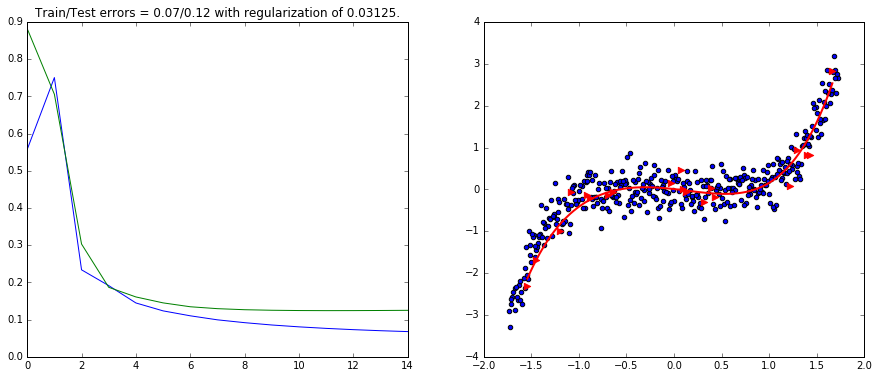

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0 of 15. Current tr/te errors = 2.12/2.02
1 of 15. Current tr/te errors = 0.33/0.59
2 of 15. Current tr/te errors = 0.27/0.25
3 of 15. Current tr/te errors = 0.16/0.26
4 of 15. Current tr/te errors = 0.14/0.19
5 of 15. Current tr/te errors = 0.12/0.18
6 of 15. Current tr/te errors = 0.10/0.17
7 of 15. Current tr/te errors = 0.10/0.17
8 of 15. Current tr/te errors = 0.09/0.16
9 of 15. Current tr/te errors = 0.08/0.16
10 of 15. Current tr/te errors = 0.08/0.16
11 of 15. Current tr/te errors = 0.07/0.16
12 of 15. Current tr/te errors = 0.07/0.16
13 of 15. Current tr/te errors = 0.07/0.16
14 of 15. Current tr/te errors = 0.07/0.16


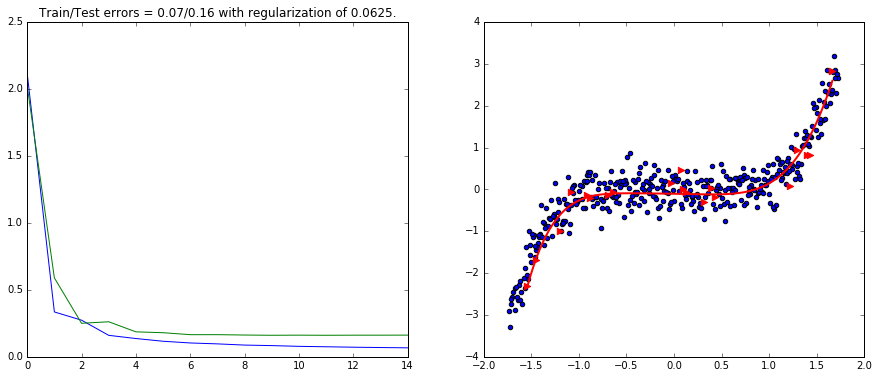


0 of 15. Current tr/te errors = 0.55/0.90


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


1 of 15. Current tr/te errors = 0.61/0.67
2 of 15. Current tr/te errors = 0.28/0.29
3 of 15. Current tr/te errors = 0.26/0.22
4 of 15. Current tr/te errors = 0.22/0.21
5 of 15. Current tr/te errors = 0.19/0.19
6 of 15. Current tr/te errors = 0.17/0.17
7 of 15. Current tr/te errors = 0.16/0.16
8 of 15. Current tr/te errors = 0.14/0.15
9 of 15. Current tr/te errors = 0.13/0.15
10 of 15. Current tr/te errors = 0.12/0.15
11 of 15. Current tr/te errors = 0.11/0.14
12 of 15. Current tr/te errors = 0.11/0.14
13 of 15. Current tr/te errors = 0.10/0.14
14 of 15. Current tr/te errors = 0.10/0.14


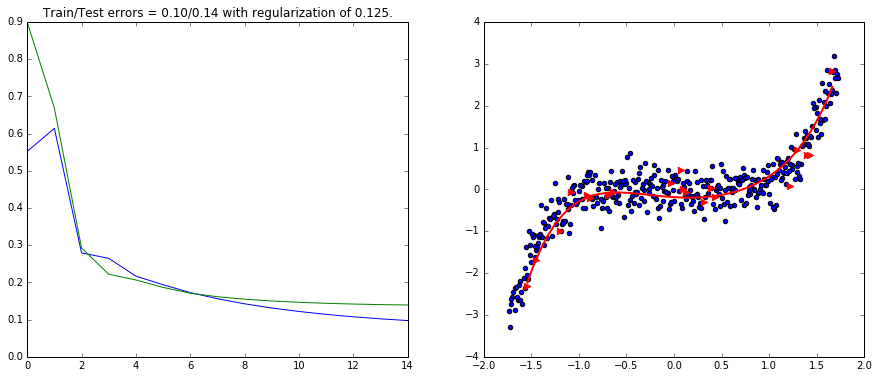

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0 of 15. Current tr/te errors = 2.58/4.76
1 of 15. Current tr/te errors = 1.11/1.66
2 of 15. Current tr/te errors = 0.52/0.78
3 of 15. Current tr/te errors = 0.29/0.50
4 of 15. Current tr/te errors = 0.15/0.36
5 of 15. Current tr/te errors = 0.10/0.26
6 of 15. Current tr/te errors = 0.08/0.23
7 of 15. Current tr/te errors = 0.07/0.21
8 of 15. Current tr/te errors = 0.06/0.20
9 of 15. Current tr/te errors = 0.06/0.20
10 of 15. Current tr/te errors = 0.06/0.19
11 of 15. Current tr/te errors = 0.06/0.19
12 of 15. Current tr/te errors = 0.06/0.19
13 of 15. Current tr/te errors = 0.06/0.19
14 of 15. Current tr/te errors = 0.06/0.19


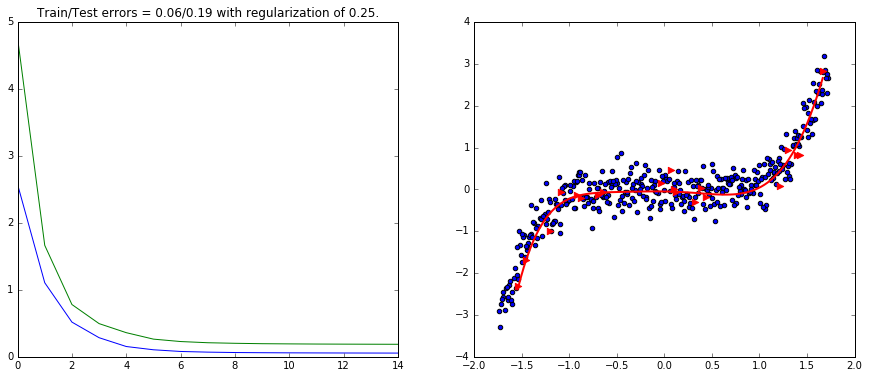

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0 of 15. Current tr/te errors = 0.42/0.77
1 of 15. Current tr/te errors = 0.21/0.37
2 of 15. Current tr/te errors = 0.15/0.13
3 of 15. Current tr/te errors = 0.12/0.17
4 of 15. Current tr/te errors = 0.12/0.16
5 of 15. Current tr/te errors = 0.11/0.16
6 of 15. Current tr/te errors = 0.10/0.15
7 of 15. Current tr/te errors = 0.09/0.15
8 of 15. Current tr/te errors = 0.09/0.14
9 of 15. Current tr/te errors = 0.09/0.14
10 of 15. Current tr/te errors = 0.08/0.14
11 of 15. Current tr/te errors = 0.08/0.14
12 of 15. Current tr/te errors = 0.08/0.14
13 of 15. Current tr/te errors = 0.07/0.14
14 of 15. Current tr/te errors = 0.07/0.14


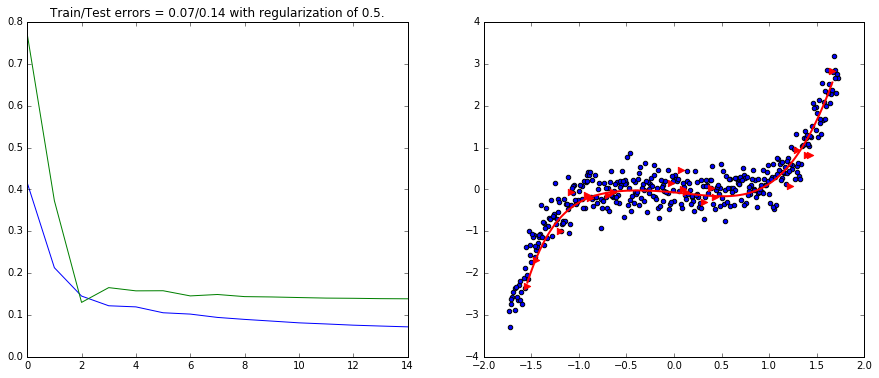

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0 of 15. Current tr/te errors = 2.74/6.28
1 of 15. Current tr/te errors = 0.61/1.03
2 of 15. Current tr/te errors = 0.45/0.52
3 of 15. Current tr/te errors = 0.22/0.47
4 of 15. Current tr/te errors = 0.16/0.34
5 of 15. Current tr/te errors = 0.11/0.27
6 of 15. Current tr/te errors = 0.10/0.24
7 of 15. Current tr/te errors = 0.09/0.22
8 of 15. Current tr/te errors = 0.08/0.21
9 of 15. Current tr/te errors = 0.08/0.20
10 of 15. Current tr/te errors = 0.08/0.19
11 of 15. Current tr/te errors = 0.07/0.19
12 of 15. Current tr/te errors = 0.07/0.19
13 of 15. Current tr/te errors = 0.07/0.18
14 of 15. Current tr/te errors = 0.07/0.18


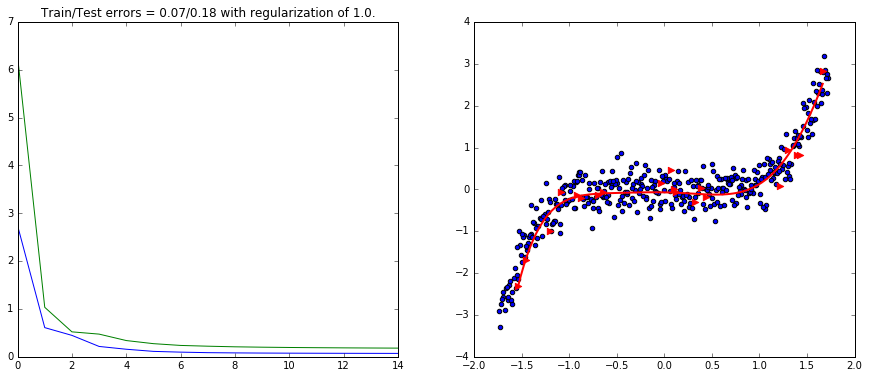

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0 of 15. Current tr/te errors = 2.58/4.25
1 of 15. Current tr/te errors = 0.98/0.96
2 of 15. Current tr/te errors = 0.43/0.46
3 of 15. Current tr/te errors = 0.19/0.26
4 of 15. Current tr/te errors = 0.14/0.18
5 of 15. Current tr/te errors = 0.08/0.14
6 of 15. Current tr/te errors = 0.08/0.13
7 of 15. Current tr/te errors = 0.06/0.12
8 of 15. Current tr/te errors = 0.07/0.12
9 of 15. Current tr/te errors = 0.06/0.12
10 of 15. Current tr/te errors = 0.06/0.11
11 of 15. Current tr/te errors = 0.06/0.11
12 of 15. Current tr/te errors = 0.06/0.11
13 of 15. Current tr/te errors = 0.06/0.11
14 of 15. Current tr/te errors = 0.06/0.11


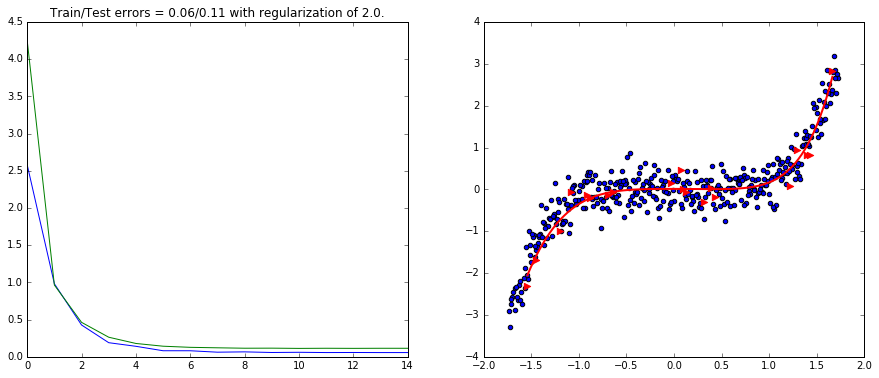

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0 of 15. Current tr/te errors = 2.22/4.16
1 of 15. Current tr/te errors = 0.32/0.61
2 of 15. Current tr/te errors = 0.22/0.41
3 of 15. Current tr/te errors = 0.19/0.35
4 of 15. Current tr/te errors = 0.15/0.26
5 of 15. Current tr/te errors = 0.11/0.19
6 of 15. Current tr/te errors = 0.10/0.16
7 of 15. Current tr/te errors = 0.09/0.14
8 of 15. Current tr/te errors = 0.08/0.13
9 of 15. Current tr/te errors = 0.08/0.12
10 of 15. Current tr/te errors = 0.07/0.11
11 of 15. Current tr/te errors = 0.07/0.11
12 of 15. Current tr/te errors = 0.07/0.11
13 of 15. Current tr/te errors = 0.07/0.11
14 of 15. Current tr/te errors = 0.07/0.11


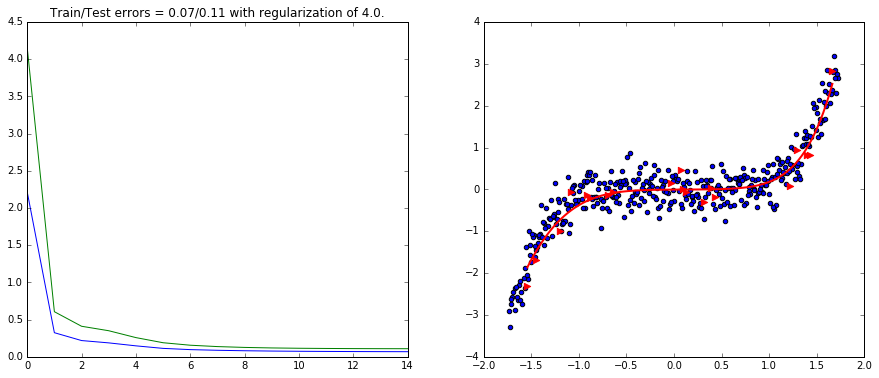

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0 of 15. Current tr/te errors = 4.99/4.60
1 of 15. Current tr/te errors = 1.57/1.98
2 of 15. Current tr/te errors = 0.93/0.91
3 of 15. Current tr/te errors = 0.41/0.43
4 of 15. Current tr/te errors = 0.27/0.26
5 of 15. Current tr/te errors = 0.14/0.15
6 of 15. Current tr/te errors = 0.13/0.12
7 of 15. Current tr/te errors = 0.09/0.11
8 of 15. Current tr/te errors = 0.09/0.10
9 of 15. Current tr/te errors = 0.08/0.10
10 of 15. Current tr/te errors = 0.08/0.10
11 of 15. Current tr/te errors = 0.08/0.10
12 of 15. Current tr/te errors = 0.08/0.10
13 of 15. Current tr/te errors = 0.08/0.10
14 of 15. Current tr/te errors = 0.08/0.10


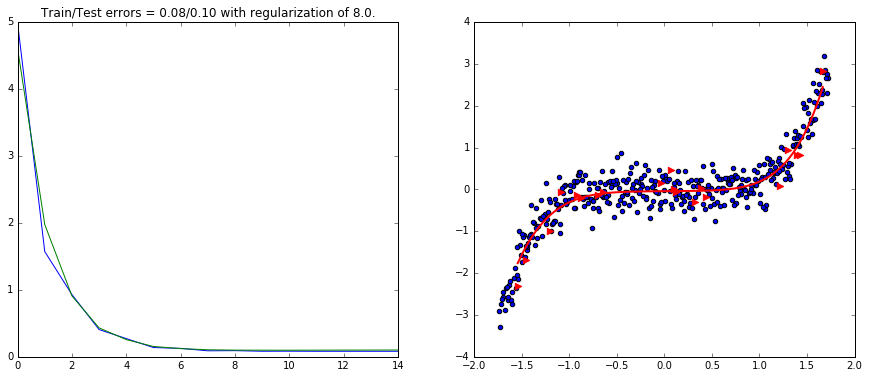

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0 of 15. Current tr/te errors = 0.59/0.68
1 of 15. Current tr/te errors = 0.38/0.30
2 of 15. Current tr/te errors = 0.15/0.14
3 of 15. Current tr/te errors = 0.17/0.16
4 of 15. Current tr/te errors = 0.19/0.17
5 of 15. Current tr/te errors = 0.15/0.15
6 of 15. Current tr/te errors = 0.15/0.14
7 of 15. Current tr/te errors = 0.14/0.14
8 of 15. Current tr/te errors = 0.14/0.13
9 of 15. Current tr/te errors = 0.13/0.13
10 of 15. Current tr/te errors = 0.13/0.13
11 of 15. Current tr/te errors = 0.13/0.13
12 of 15. Current tr/te errors = 0.13/0.12
13 of 15. Current tr/te errors = 0.13/0.12
14 of 15. Current tr/te errors = 0.13/0.12


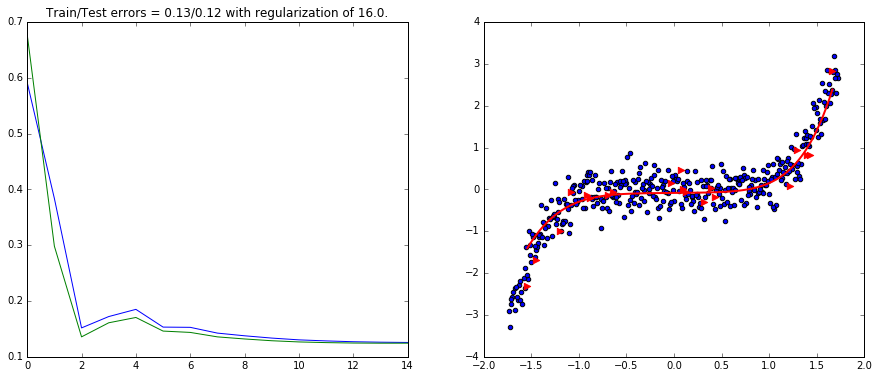

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0 of 15. Current tr/te errors = 0.36/0.42
1 of 15. Current tr/te errors = 0.45/0.40
2 of 15. Current tr/te errors = 0.29/0.24
3 of 15. Current tr/te errors = 0.21/0.21
4 of 15. Current tr/te errors = 0.26/0.25
5 of 15. Current tr/te errors = 0.20/0.20
6 of 15. Current tr/te errors = 0.23/0.22
7 of 15. Current tr/te errors = 0.21/0.21
8 of 15. Current tr/te errors = 0.22/0.21
9 of 15. Current tr/te errors = 0.21/0.21
10 of 15. Current tr/te errors = 0.21/0.21
11 of 15. Current tr/te errors = 0.22/0.21
12 of 15. Current tr/te errors = 0.22/0.21
13 of 15. Current tr/te errors = 0.22/0.21
14 of 15. Current tr/te errors = 0.22/0.21


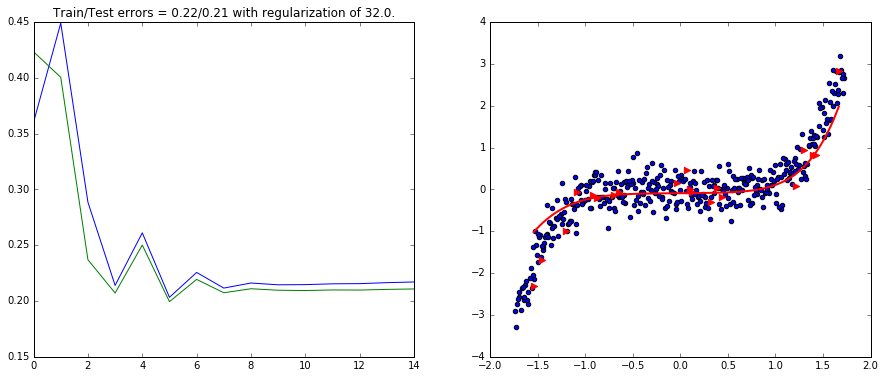

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0 of 15. Current tr/te errors = 3.00/2.75
1 of 15. Current tr/te errors = 1.92/1.74
2 of 15. Current tr/te errors = 1.00/0.86
3 of 15. Current tr/te errors = 0.77/0.67
4 of 15. Current tr/te errors = 0.57/0.51
5 of 15. Current tr/te errors = 0.47/0.42
6 of 15. Current tr/te errors = 0.41/0.38
7 of 15. Current tr/te errors = 0.39/0.37
8 of 15. Current tr/te errors = 0.38/0.37
9 of 15. Current tr/te errors = 0.37/0.36
10 of 15. Current tr/te errors = 0.37/0.36
11 of 15. Current tr/te errors = 0.37/0.36
12 of 15. Current tr/te errors = 0.37/0.37
13 of 15. Current tr/te errors = 0.37/0.37
14 of 15. Current tr/te errors = 0.37/0.37


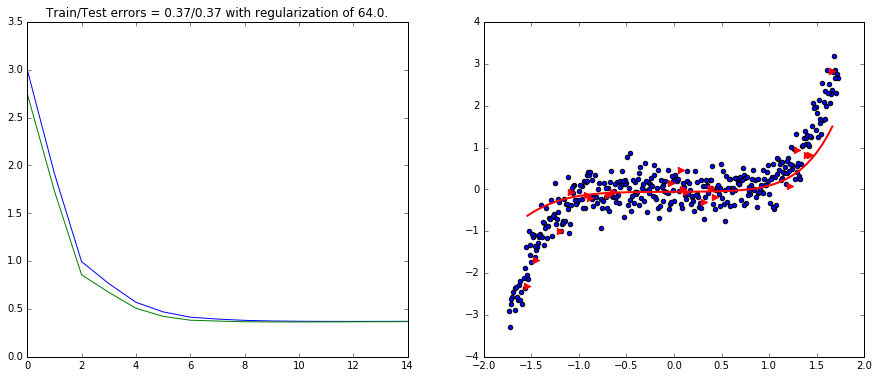

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0 of 15. Current tr/te errors = 0.66/0.83
1 of 15. Current tr/te errors = 0.78/0.86
2 of 15. Current tr/te errors = 0.46/0.49
3 of 15. Current tr/te errors = 0.55/0.59
4 of 15. Current tr/te errors = 0.51/0.53
5 of 15. Current tr/te errors = 0.53/0.56
6 of 15. Current tr/te errors = 0.52/0.55
7 of 15. Current tr/te errors = 0.53/0.55
8 of 15. Current tr/te errors = 0.53/0.55
9 of 15. Current tr/te errors = 0.53/0.55
10 of 15. Current tr/te errors = 0.53/0.56
11 of 15. Current tr/te errors = 0.54/0.56
12 of 15. Current tr/te errors = 0.54/0.56
13 of 15. Current tr/te errors = 0.54/0.56
14 of 15. Current tr/te errors = 0.54/0.56


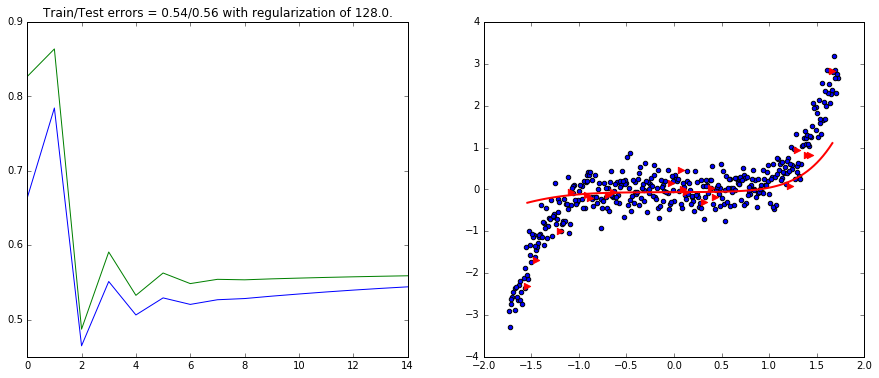


0 of 15. Current tr/te errors = 0.27/0.28


Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


1 of 15. Current tr/te errors = 0.75/0.89
2 of 15. Current tr/te errors = 0.64/0.75
3 of 15. Current tr/te errors = 0.65/0.74
4 of 15. Current tr/te errors = 0.65/0.74
5 of 15. Current tr/te errors = 0.63/0.69
6 of 15. Current tr/te errors = 0.64/0.69
7 of 15. Current tr/te errors = 0.64/0.69
8 of 15. Current tr/te errors = 0.65/0.70
9 of 15. Current tr/te errors = 0.67/0.71
10 of 15. Current tr/te errors = 0.68/0.71
11 of 15. Current tr/te errors = 0.68/0.72
12 of 15. Current tr/te errors = 0.69/0.72
13 of 15. Current tr/te errors = 0.69/0.72
14 of 15. Current tr/te errors = 0.70/0.72


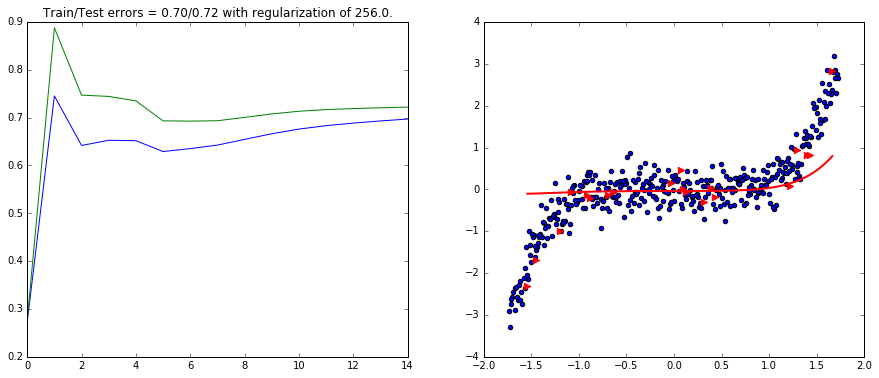

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


0 of 15. Current tr/te errors = 1.43/1.30
1 of 15. Current tr/te errors = 1.03/1.18
2 of 15. Current tr/te errors = 0.79/0.92
3 of 15. Current tr/te errors = 0.65/0.72
4 of 15. Current tr/te errors = 0.67/0.73
5 of 15. Current tr/te errors = 0.70/0.77
6 of 15. Current tr/te errors = 0.73/0.80
7 of 15. Current tr/te errors = 0.76/0.83
8 of 15. Current tr/te errors = 0.77/0.84
9 of 15. Current tr/te errors = 0.78/0.84
10 of 15. Current tr/te errors = 0.79/0.83
11 of 15. Current tr/te errors = 0.79/0.83
12 of 15. Current tr/te errors = 0.80/0.84
13 of 15. Current tr/te errors = 0.81/0.84
14 of 15. Current tr/te errors = 0.81/0.84


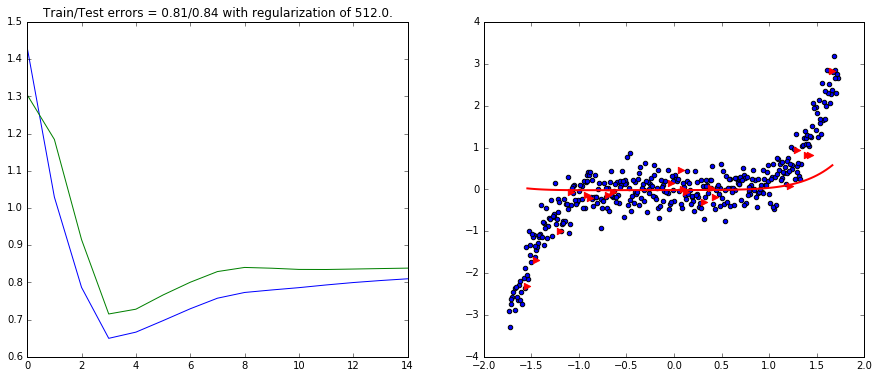

In [5]:
epochs = 15


for l2 in np.logspace(-10,10,num=20, base=2, endpoint=False):
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        tf.set_random_seed(100689)
        # Fit all training data

        learningRate = 0.06
    
        trLosses = []
        teLosses = []
        for epoch in tqdm_notebook(range(epochs)):

            for i in xrange(XTr.shape[0]):
                xi = XTr[i].reshape(1,1)
                yi = YTr[i].reshape(1,1)
                _ = sess.run([train], feed_dict={x: xi, y: yi, lr:learningRate, l2Pen:l2})


            learningRate /= 1.1

            trainError = mse.eval(feed_dict={x:XTr,y:YTr})
            testError = mse.eval(feed_dict={x:XTe,y:YTe})


            trLosses.append(trainError)
            teLosses.append(testError)
            print("{0} of {1}. Current tr/te errors = {2:.2f}/{3:.2f}".format(epoch,epochs,trainError,testError))
            if epoch == epochs -1 :
                plt.subplot(121)
                plt.title("Train/Test errors = {0:.2f}/{1:.2f} with regularization of {2}.".format(trainError,testError,l2))
                plt.plot(trLosses)
                plt.plot(teLosses)

                plt.subplot(122)
                plt.scatter(XTe,YTe)
                plt.scatter(XTr,YTr,color='red',s=200,marker=">")
                XTrS = np.linspace(XTr.min(),XTr.max(),100).reshape(100,1)
                yPred_ = yPred.eval(feed_dict={x:XTrS})
                plt.plot(XTrS,yPred_,"r",linewidth=2.0)
                plt.show()
            Ws =[v for v in tf.all_variables()]
            Ws

            